# **Project - Unsupervised Learning**

**Author:** Bright Kyeremeh (MrBriit)

<br>

**Data Description:**

    The data contains features extracted from the silhouette of vehicles in different
    angles. Four "Corgie" model vehicles were used for the experiment: a double
    decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This
    particular combination of vehicles was chosen with the expectation that the
    bus, van and either one of the cars would be readily distinguishable, but it
    would be more difficult to distinguish between the cars.

**Domain:**

    Object recognition

**Context:**

    The purpose is to classify a given silhouette as one of three types of vehicle,
    using a set of features extracted from the silhouette. The vehicle may be viewed
    from one of many different angles.

**Attribute Information:**

    ● All the features are geometric features extracted from the silhouette.

    ● All are numeric in nature.

**Learning Outcomes:**

    ● Exploratory Data Analysis

    ● Reduce number dimensions in the dataset with minimal information loss

    ● Train a model using Principle Components

**Objective:**

    Apply dimensionality reduction technique – PCA and train a model using
    principle components instead of training the model using just the raw data.

<br>

**NB: In this notebook, we will be importing our libraries as at when we need.**

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd #loading our dataset

%matplotlib inline

df= pd.read_csv("vehicle-1.csv")

In [31]:
df.head() # view the first 5 rows

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

<br>

## **Data pre-processing**

In [32]:
df.dtypes #checking the data types of each column

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [33]:
df.shape #the shape of the dataset

(846, 19)

In [34]:
df.describe().T #the 5-number summary of the dataset

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [35]:
df.isna().sum() #checking for null values

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [36]:
#Defining dependent variables and the independent variables

#creating a copy in order to comapare the two datasets (with and without missing values)
#newdf = df.copy()

X = df.iloc[:,0:18] #selecting the numerical attributes 
y = df.iloc[:,18] #selecting class attribute. 

<br>

#### Fill missing values with median of the columns

In [37]:

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='median', verbose=1)

transformed_values = imputer.fit_transform(X)
column = X.columns
df1 = pd.DataFrame(transformed_values, columns = column )

In [38]:
df1.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
dtype: int64

<br>

## **Understanding the attributes**

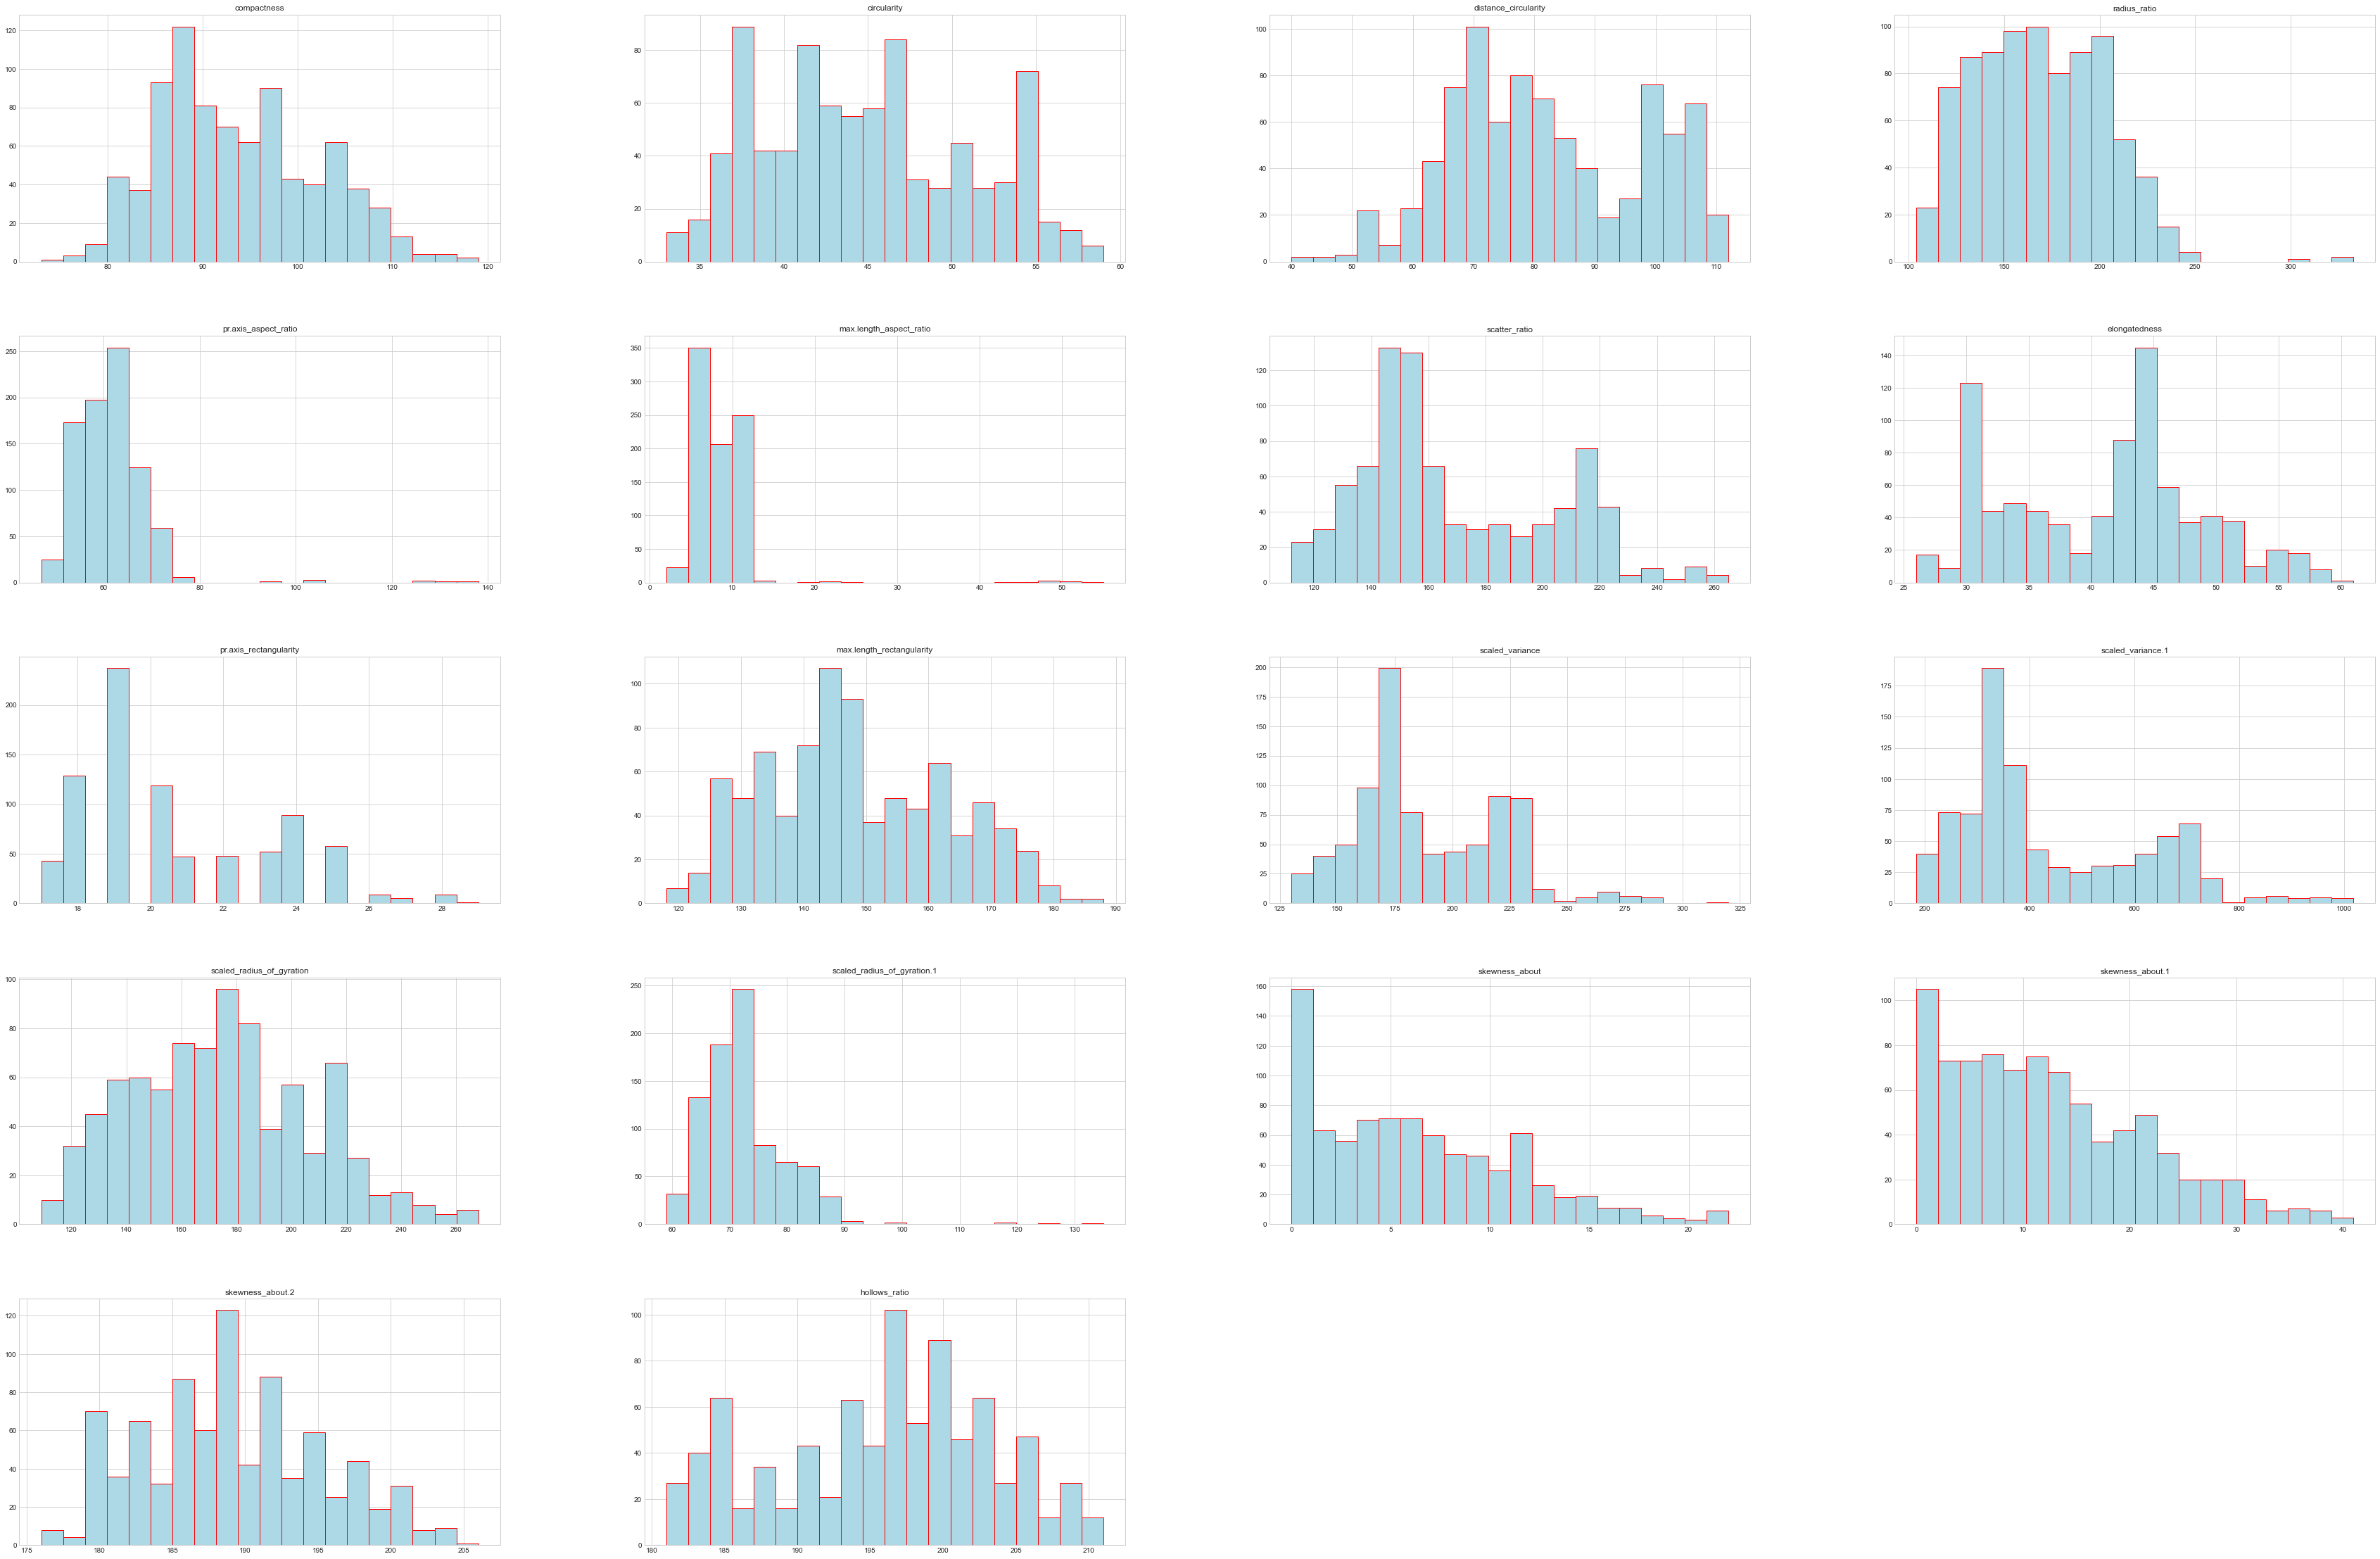

In [49]:
#Distribution of the independent variables

plt.style.use('seaborn-whitegrid')

df1.hist(bins=20, figsize=(60,40), color='lightblue', edgecolor = 'red')
plt.show()

From the above plot, it can be seen most of the attributes are normally distributed with few skewed to the right and left.

<AxesSubplot:>

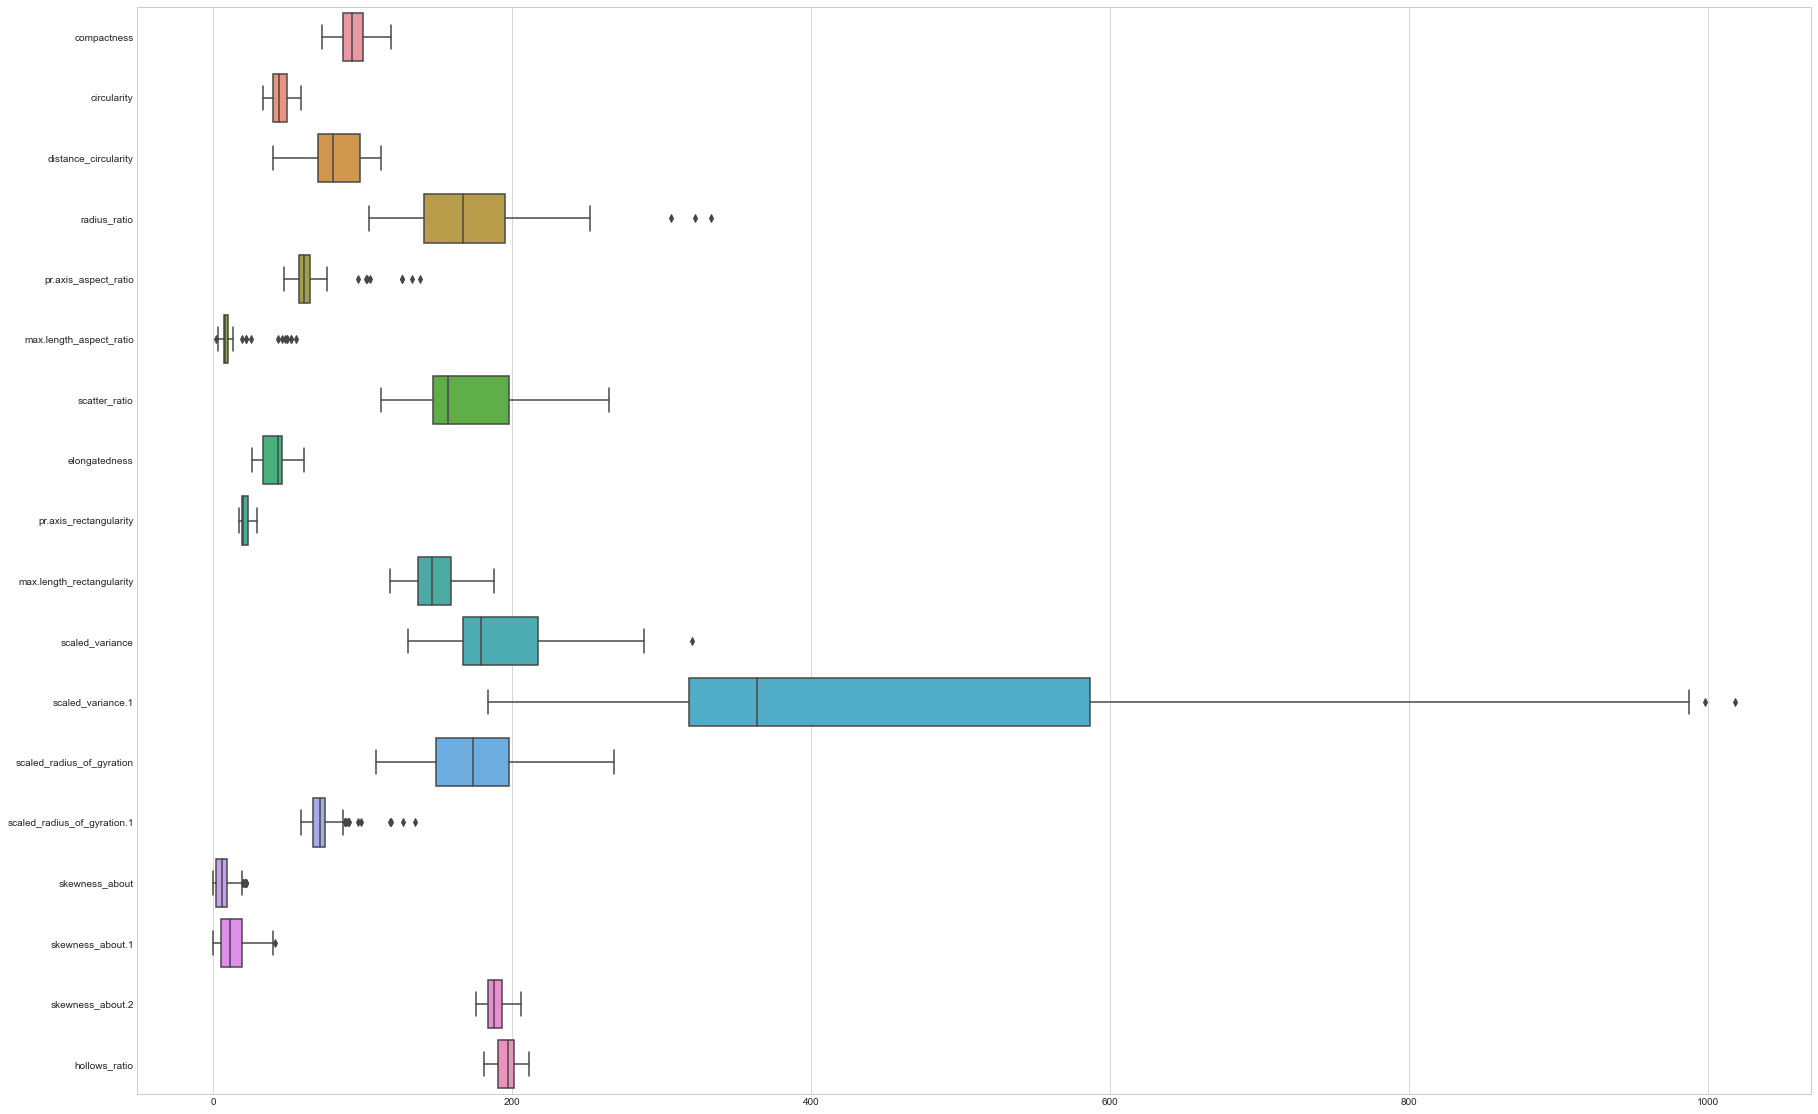

In [40]:
#boxplot distribution of the independent variables

plt.figure(figsize= (30,20))
sns.boxplot(data=df1,orient="h")

Scaled_variance_1 is having a huge effect on our data distribution since is having a wider measurement of scale. We will therefore drop that and visualise it alone while we visualise the rest of the data set.

<AxesSubplot:>

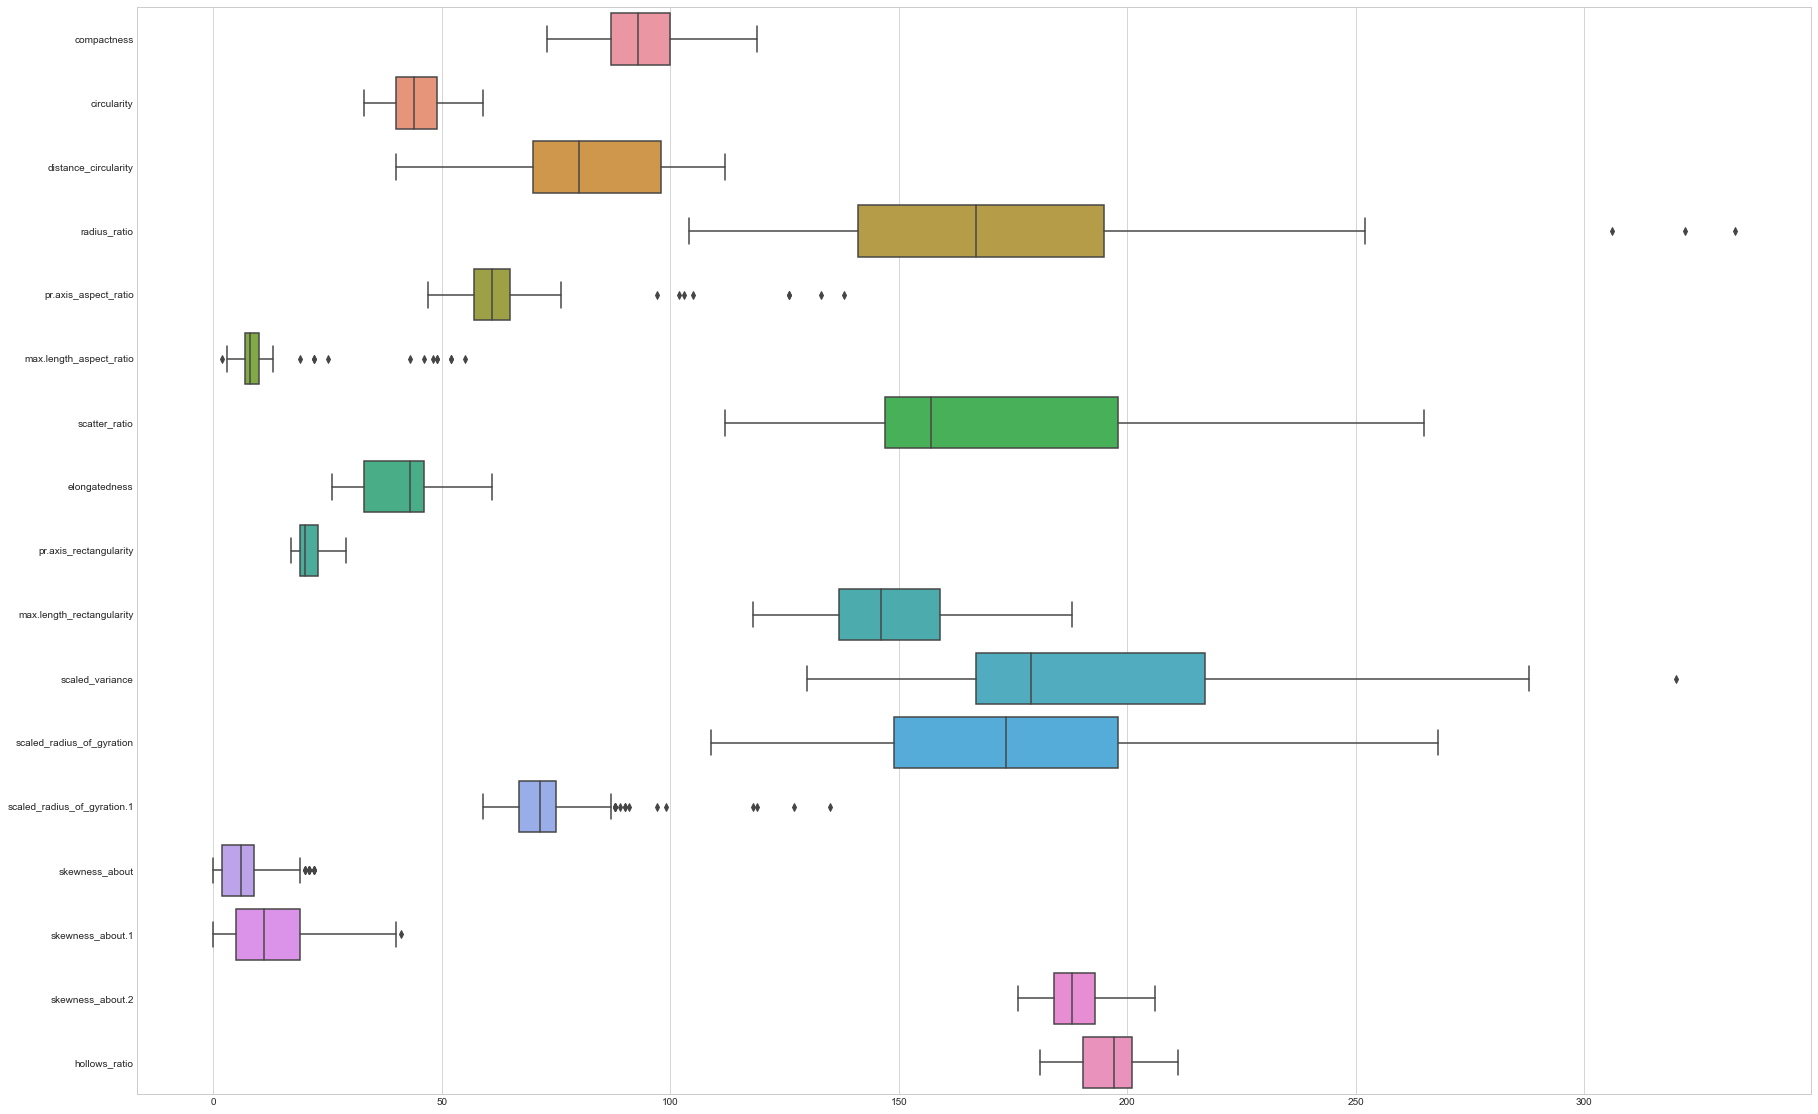

In [41]:
#boxplot distribution of the independent variables without Scaled_variance_1 

plt.figure(figsize= (30,20))
sns.boxplot(data=df1.drop('scaled_variance.1',axis=1),orient="h")

now we can have a better look at our data and can observe that many of data attributes contains outliers

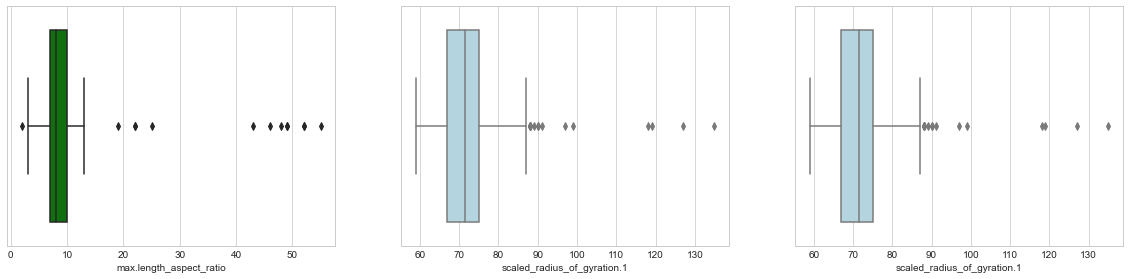

In [42]:
#Distribution of variables with most outliers

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(x= df1['max.length_aspect_ratio'], color='green')

plt.subplot(3,3,2)
sns.boxplot(x= df1['scaled_radius_of_gyration.1'], color='lightblue')

plt.subplot(3,3,3)
sns.boxplot(x= df1['scaled_radius_of_gyration.1'], color='lightblue')

plt.show()

As can be seen there a lot of outliers present in max.length_aspect_ratio,scaled_radius_of_gyration.1 and scaled_radius_of_gyration.1

## Dealing with the outliers

In [43]:
from scipy.stats import iqr

Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

compactness                     13.00
circularity                      9.00
distance_circularity            28.00
radius_ratio                    54.00
pr.axis_aspect_ratio             8.00
max.length_aspect_ratio          3.00
scatter_ratio                   51.00
elongatedness                   13.00
pr.axis_rectangularity           4.00
max.length_rectangularity       22.00
scaled_variance                 50.00
scaled_variance.1              268.50
scaled_radius_of_gyration       49.00
scaled_radius_of_gyration.1      8.00
skewness_about                   7.00
skewness_about.1                14.00
skewness_about.2                 9.00
hollows_ratio                   10.75
dtype: float64


In [44]:
df2 = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [45]:
df2.shape

(813, 18)

In [46]:
df1.shape

(846, 18)

## Visualising the data without outliers

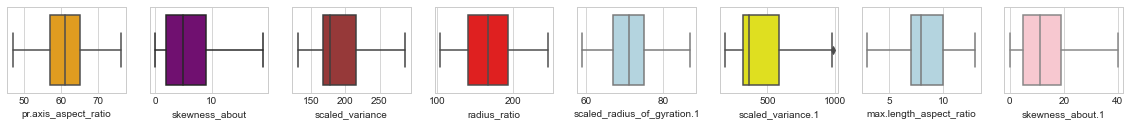

In [47]:
plt.figure(figsize= (20,15))
plt.subplot(8,8,1)
sns.boxplot(x= df2['pr.axis_aspect_ratio'], color='orange')

plt.subplot(8,8,2)
sns.boxplot(x= df2['skewness_about'], color='purple')

plt.subplot(8,8,3)
sns.boxplot(x= df2['scaled_variance'], color='brown')

plt.subplot(8,8,4)
sns.boxplot(x= df2['radius_ratio'], color='red')

plt.subplot(8,8,5)
sns.boxplot(x= df2['scaled_radius_of_gyration.1'], color='lightblue')

plt.subplot(8,8,6)
sns.boxplot(x= df2['scaled_variance.1'], color='yellow')

plt.subplot(8,8,7)
sns.boxplot(x= df2['max.length_aspect_ratio'], color='lightblue')

plt.subplot(8,8,8)
sns.boxplot(x= df2['skewness_about.1'], color='pink')

plt.show()

We can clearly seen that the outliers are being removed. We could have ignored this process if the outliers were too many and out datasets were also large.

car    429
bus    218
van    199
Name: class, dtype: int64


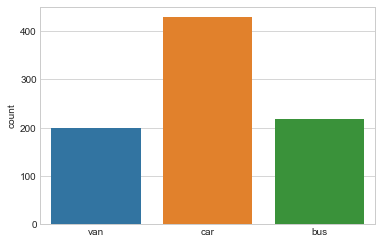

In [57]:
#Counts of our dependent variable

print(y.value_counts())

#splitscaledf = df1.copy()
sns.countplot(x = y.values)
plt.show()

## **Correlation between the independent attributes**

In [ ]:

df1.corr()

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.684887              0.789928   
circularity                     0.684887     1.000000              0.792320   
distance_circularity            0.789928     0.792320              1.000000   
radius_ratio                    0.689743     0.620912              0.767035   
pr.axis_aspect_ratio            0.091534     0.153778              0.158456   
max.length_aspect_ratio         0.148249     0.251467              0.264686   
scatter_ratio                   0.812620     0.847938              0.905076   
elongatedness                  -0.788750    -0.821472             -0.911307   
pr.axis_rectangularity          0.813694     0.843400              0.893025   
max.length_rectangularity       0.676143     0.961318              0.774527   
scaled_variance                 0.762070     0.796306              0.861519   
scaled_variance.1               0.814012     0.835946              0.886017   
scaled_radius_of_gyration       0.585243     0.925816              0.705771   
scaled_radius_of_gyration.1    -0.249593     0.051946             -0.225944   
skewness_about                  0.236078     0.144198              0.113924   
skewness_about.1                0.157015    -0.011439              0.265547   
skewness_about.2                0.298537    -0.104426              0.146098   
hollows_ratio                   0.365552     0.046351              0.332732   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.689743              0.091534   
circularity                      0.620912              0.153778   
distance_circularity             0.767035              0.158456   
radius_ratio                     1.000000              0.663447   
pr.axis_aspect_ratio             0.663447              1.000000   
max.length_aspect_ratio          0.450052              0.648724   
scatter_ratio                    0.734429              0.103732   
elongatedness                   -0.789481             -0.183035   
pr.axis_rectangularity           0.708385              0.079604   
max.length_rectangularity        0.568949              0.126909   
scaled_variance                  0.793415              0.272910   
scaled_variance.1                0.718436              0.089189   
scaled_radius_of_gyration        0.536372              0.121971   
scaled_radius_of_gyration.1     -0.180397              0.152950   
skewness_about                   0.048713             -0.058371   
skewness_about.1                 0.173741             -0.031976   
skewness_about.2                 0.382214              0.239886   
hollows_ratio                    0.471309              0.267725   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.148249       0.812620   
circularity                                 0.251467       0.847938   
distance_circularity                        0.264686       0.905076   
radius_ratio                                0.450052       0.734429   
pr.axis_aspect_ratio                        0.648724       0.103732   
max.length_aspect_ratio                     1.000000       0.166191   
scatter_ratio                               0.166191       1.000000   
elongatedness                              -0.180140      -0.971601   
pr.axis_rectangularity                      0.161502       0.989751   
max.length_rectangularity                   0.305943       0.809083   
scaled_variance                             0.318957       0.948662   
scaled_variance.1                           0.143253       0.993012   
scaled_radius_of_gyration                   0.189743       0.799875   
scaled_radius_of_gyration.1                 0.295735      -0.027542   
skewness_about                              0.015599       0.074458   
skewness_about.1                            0.043422       0.212428   
skewness_about.2                           -0.

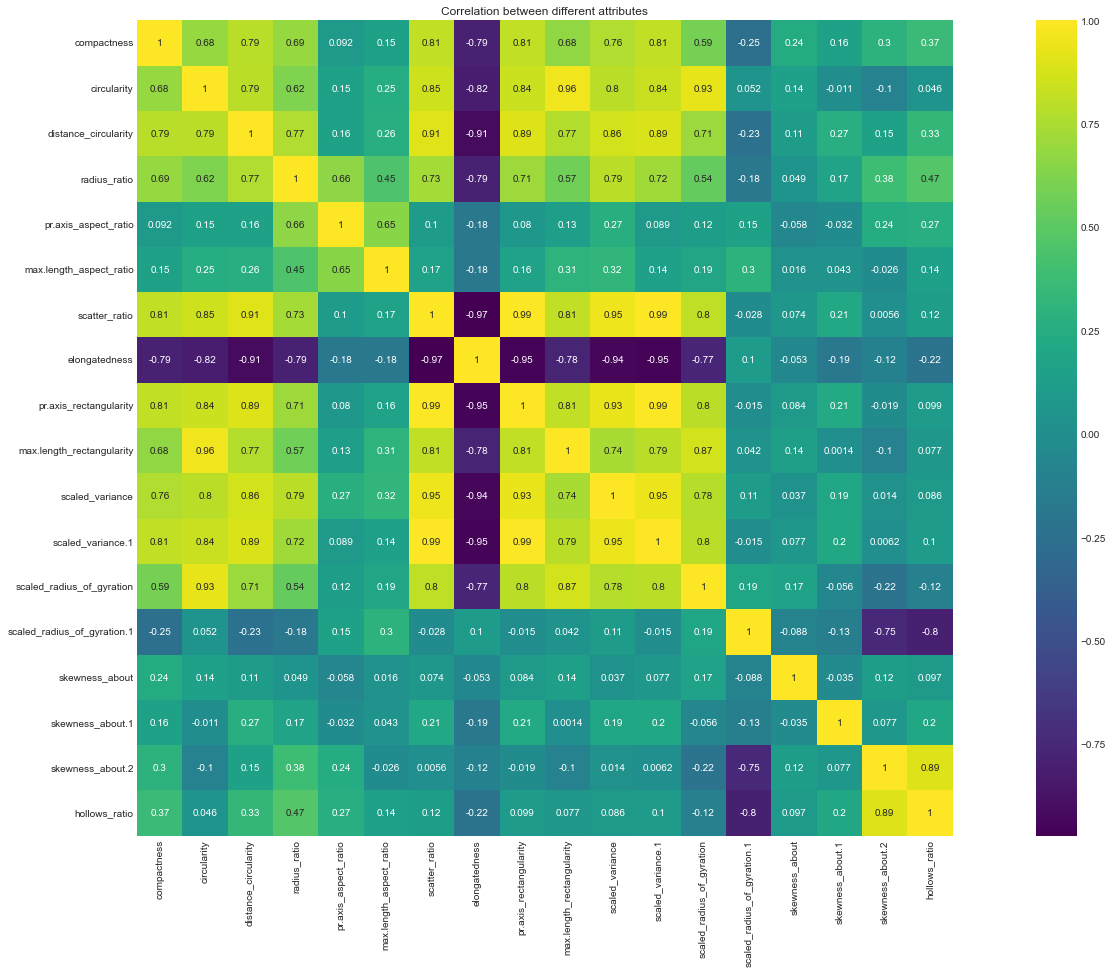

In [58]:
#Heatmap of the correlation between the indepent attributes

plt.figure(figsize=(30,15))
sns.heatmap(df1.corr(), vmax=1, square=True,annot=True,cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

      - pr.axis_recatngularity and Scaled Variance.1 have very high correlated with value of 0.99
      - scatter_ratio and pr.axis_recatngularity have very high correlated with value of 0.99
      - max.length_recatngularity and circularity also have very high correlated with value of 0.96
       
         Among other features as well.
       
         However, there some features which very low correlated and even negatively correlated such as:
       
       - skewness_about.2 and circularity with a value of -0.1
       - scaled_radius_of_gyration_1 and radius_ratio with a value of -0.18
       
       Among other relationships can be clearly seen from the heatmap

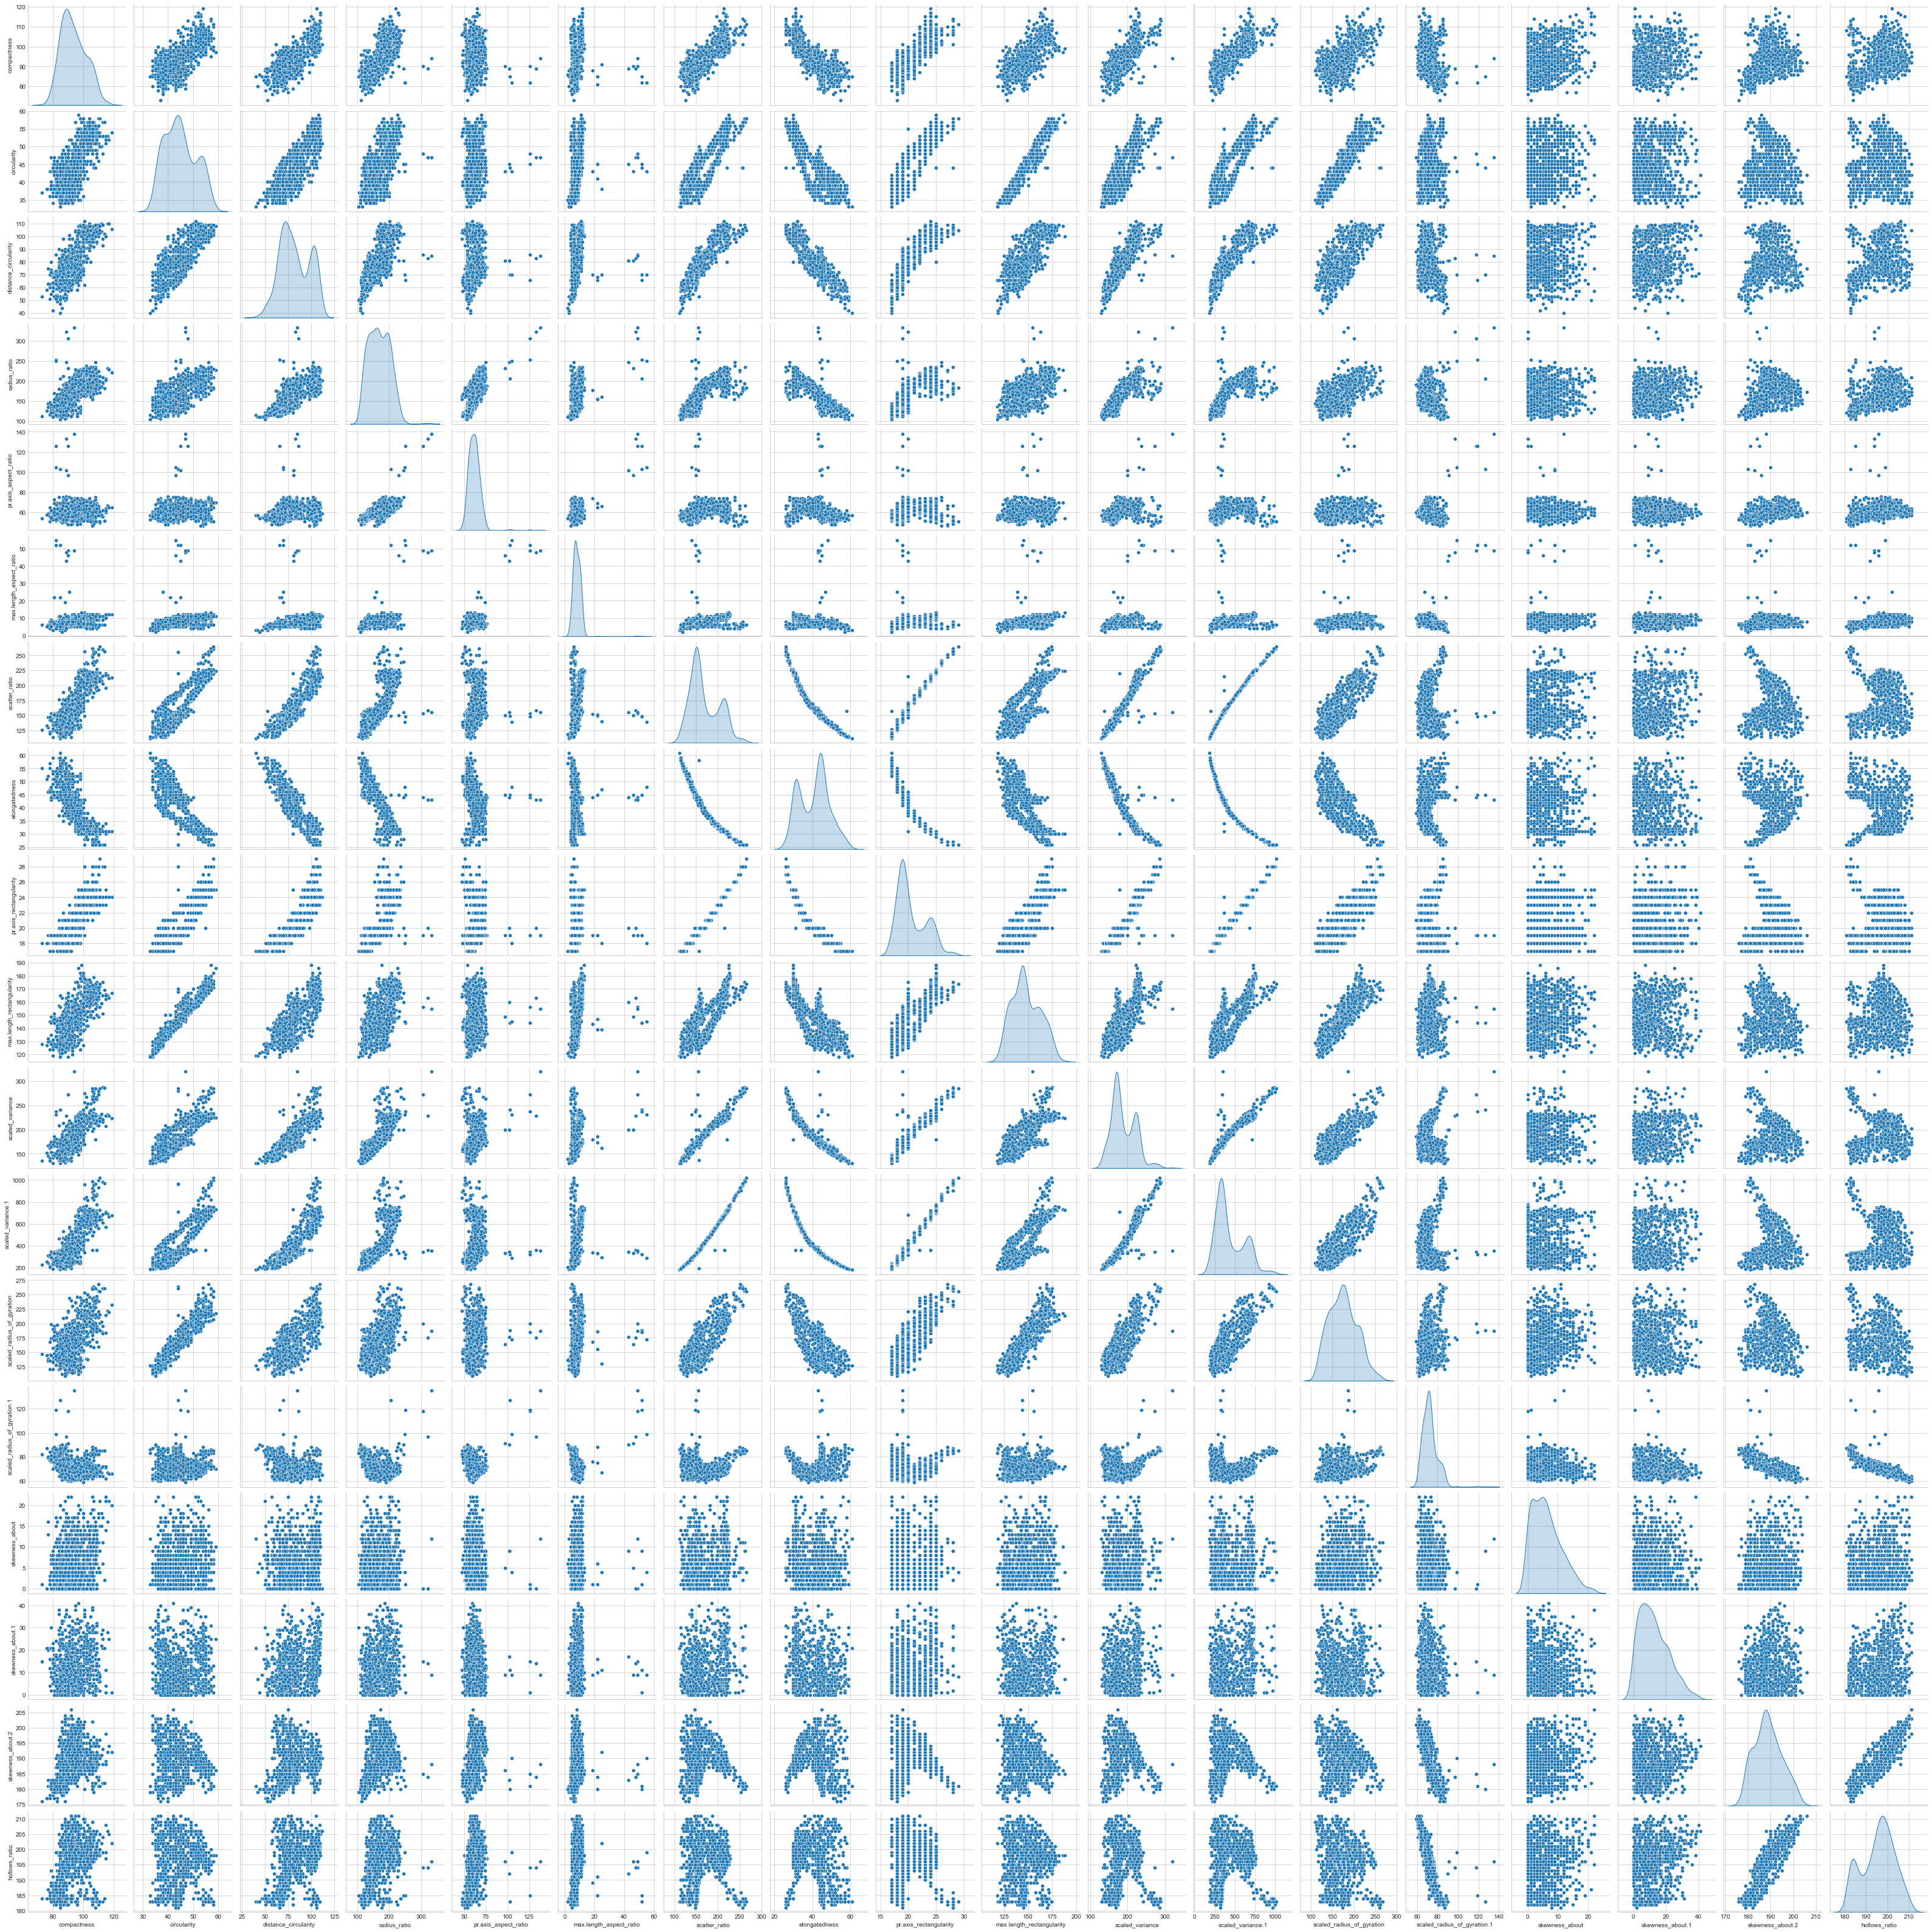

In [59]:
#Pairplot of the correlation/distribution between various independent attributes
sns.pairplot(df1, diag_kind="kde")

The pairplot above validate the insights derived from our earlier heatmap. Scaled Variance & Scaled Variance.1 seems to be have very strong positive correlation with value of 0.95. skewness_about_2 and hollow_ratio also seems to have strong positive correation with coeff: 0.89

scatter_ratio and elongatedness seems to be have very strong negative correlation. elongatedness and pr.axis_rectangularity seems to have strong negative correlation with val of -0.97

We found from our pairplot analysis that, Scaled Variance & Scaled Variance.1 and elongatedness and pr.axis_rectangularity to be strongly correlated , so they need to dropped of treated carefully before we go for model building.

<br>

<br>

## Choosing the right attributes  for model building

With our objective of predicting an object to be a van or bus or car based on some input features, ideally, we assume that there is little or no multicollinearity between the features. If otherwise our data contains features that are highly correlated then we will encounter what is know as **“Multicollinearity”**.

Multicollinearity can lead to a misleading results. This situation happens when one predictor variable in a multiple regression model can be linearly predicted from the others with a high degree of accuracy.

It is quit reasonable to drop one feature if we have 2 features in our datset which are highly correlated since there's no point in using both features. From the above heatmap as well as the pairplot, we recongnised that there lots of features that are highly correlated, negatively or positively with values as high as 0.99 and -0.97. 

These features are listed below:

        max.length_rectangularity
        scaled_radius_of_gyration
        skewness_about.2
        scatter_ratio
        elongatedness
        pr.axis_rectangularity
        scaled_variance
        scaled_variance.1

As pointed out earlier,the easiest way to deal with multicollinearity is to delete one of the highly correlated features. However, we will be using a better approach known as dimension reduction specifically Principle Component Analysis (PCA). 

Principal components are new variables that are constructed as linear combinations or mixtures of the initial variables. These combinations are done in such a way that the new variables (principal components) are uncorrelated and most of the information within the initial variables is squeezed or compressed into the first components.

## Performing PCA

In [60]:
#printing the shape of dependent and independnet attributes
print("shape of Independent attributes:",df1.shape)
print("shape of Dependent attributes:",y.shape)

shape of Independent attributes: (846, 18)
shape of Dependent attributes: (846,)


In [61]:
from scipy.stats import zscore
XScaled=df1.apply(zscore)
XScaled.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.518073              0.057177      0.273363   
1    -0.325470    -0.623732              0.120741     -0.835032   
2     1.254193     0.844303              1.519141      1.202018   
3    -0.082445    -0.623732             -0.006386     -0.295813   
4    -1.054545    -0.134387             -0.769150      1.082192   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.310398                 0.311542      -0.207598   
1             -0.593753                 0.094079      -0.599423   
2              0.548738                 0.311542       1.148719   
3              0.167907                 0.094079      -0.750125   
4              5.245643                 9.444962      -0.599423   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136262               -0.224342                   0.758332   
1       0.520519               -0.610886                  -0.344578   
2      -1.144597                0.935290                   0.689401   
3       0.648605               -0.610886                  -0.344578   
4       0.520519               -0.610886                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.401920          -0.341934                   0.285705   
1        -0.593357          -0.619724                  -0.513630   
2         1.097671           1.109379                   1.392477   
3        -0.912419          -0.738777                  -1.466683   
4         1.671982          -0.648070                   0.408680   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.327326       -0.073812          0.380870   
1                    -0.059384        0.538390          0.156798   
2                     0.074587        1.558727         -0.403383   
3                    -1.265121       -0.073812         -0.291347   
4                     7.309005        0.538390         -0.179311   

   skewness_about.2  hollows_ratio  
0         -0.312012       0.183957  
1          0.013265       0.452977  
2         -0.149374       0.049447  
3          1.639649       1.529056  
4         -1.450481      -1.699181

In [62]:
#Alternatively

# from sklearn.preprocessing import StandardScaler
# #We transform (centralize) the entire X (independent variable data) to normalize it using standardscalar through transformation. We will create the PCA dimensions
# # on this distribution. 
# sdsc = StandardScaler()
# X_std =  sdsc.fit_transform(df1) 

In [63]:
#Getting the confusion matrix

covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  0.64949139
   0.10385472 -0.18325156  0.07969

In [64]:
covMatrix.shape #shape of the confusion matrix

(18, 18)

In [65]:
#Performing PCA on all the 18 components

from sklearn.decomposition import PCA
pca = PCA(n_components=18)
pca.fit(XScaled)

PCA(n_components=18)

<br>

The eigen Values

In [66]:
print(pca.explained_variance_) 

[9.40460261e+00 3.01492206e+00 1.90352502e+00 1.17993747e+00
 9.17260633e-01 5.39992629e-01 3.58870118e-01 2.21932456e-01
 1.60608597e-01 9.18572234e-02 6.64994118e-02 4.66005994e-02
 3.57947189e-02 2.74120657e-02 2.05792871e-02 1.79166314e-02
 1.00257898e-02 2.96445743e-03]


The eigen Vectors

In [67]:
print(pca.components_)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053415e-02
   3.27257119e-02  3.14147277e-02 -9.

In [68]:
print(pca.explained_variance_ratio_) #the variance in the Eigen vectors that we can explain. This can be visualised in the next cell below

[5.21860337e-01 1.67297684e-01 1.05626388e-01 6.54745969e-02
 5.08986889e-02 2.99641300e-02 1.99136623e-02 1.23150069e-02
 8.91215289e-03 5.09714695e-03 3.69004485e-03 2.58586200e-03
 1.98624491e-03 1.52109243e-03 1.14194232e-03 9.94191854e-04
 5.56329946e-04 1.64497408e-04]


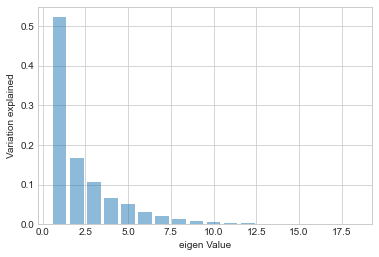

In [69]:
#visualisation of the explained variance in the Eigen vectors

plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

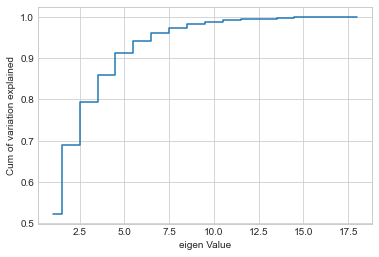

In [70]:
#Elbow visualisation of variance in the Eigen vectors

plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

<br>

# Dimensionality Reduction

Now 8 dimensions seems very reasonable. With 8 variables we can explain over 95% of the variation in the original data!

In [71]:
#Using only 8 Eigen vectors that can be explained instead of the 18 vectors

pca3 = PCA(n_components=8)
pca3.fit(XScaled)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(XScaled)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053415e-02
   3.27257119e-02  3.14147277e-02 -9.

In [72]:
Xpca3 #now we have only 8 variables instead of 18

array([[ 3.34162030e-01, -2.19026358e-01,  1.00158417e+00, ...,
        -7.57446693e-01, -9.01124283e-01, -3.81106357e-01],
       [-1.59171085e+00, -4.20602982e-01, -3.69033854e-01, ...,
        -5.17161832e-01,  3.78636988e-01,  2.47058909e-01],
       [ 3.76932418e+00,  1.95282752e-01,  8.78587404e-02, ...,
         7.05041037e-01, -3.45837595e-02,  4.82771767e-01],
       ...,
       [ 4.80917387e+00, -1.24931049e-03,  5.32333105e-01, ...,
        -2.17069763e-01,  5.73248962e-01,  1.10477865e-01],
       [-3.29409242e+00, -1.00827615e+00, -3.57003198e-01, ...,
        -4.02491279e-01, -2.02405787e-01,  3.20621635e-01],
       [-4.76505347e+00,  3.34899728e-01, -5.68136078e-01, ...,
        -3.35637136e-01,  5.80978683e-02, -2.48034955e-01]])

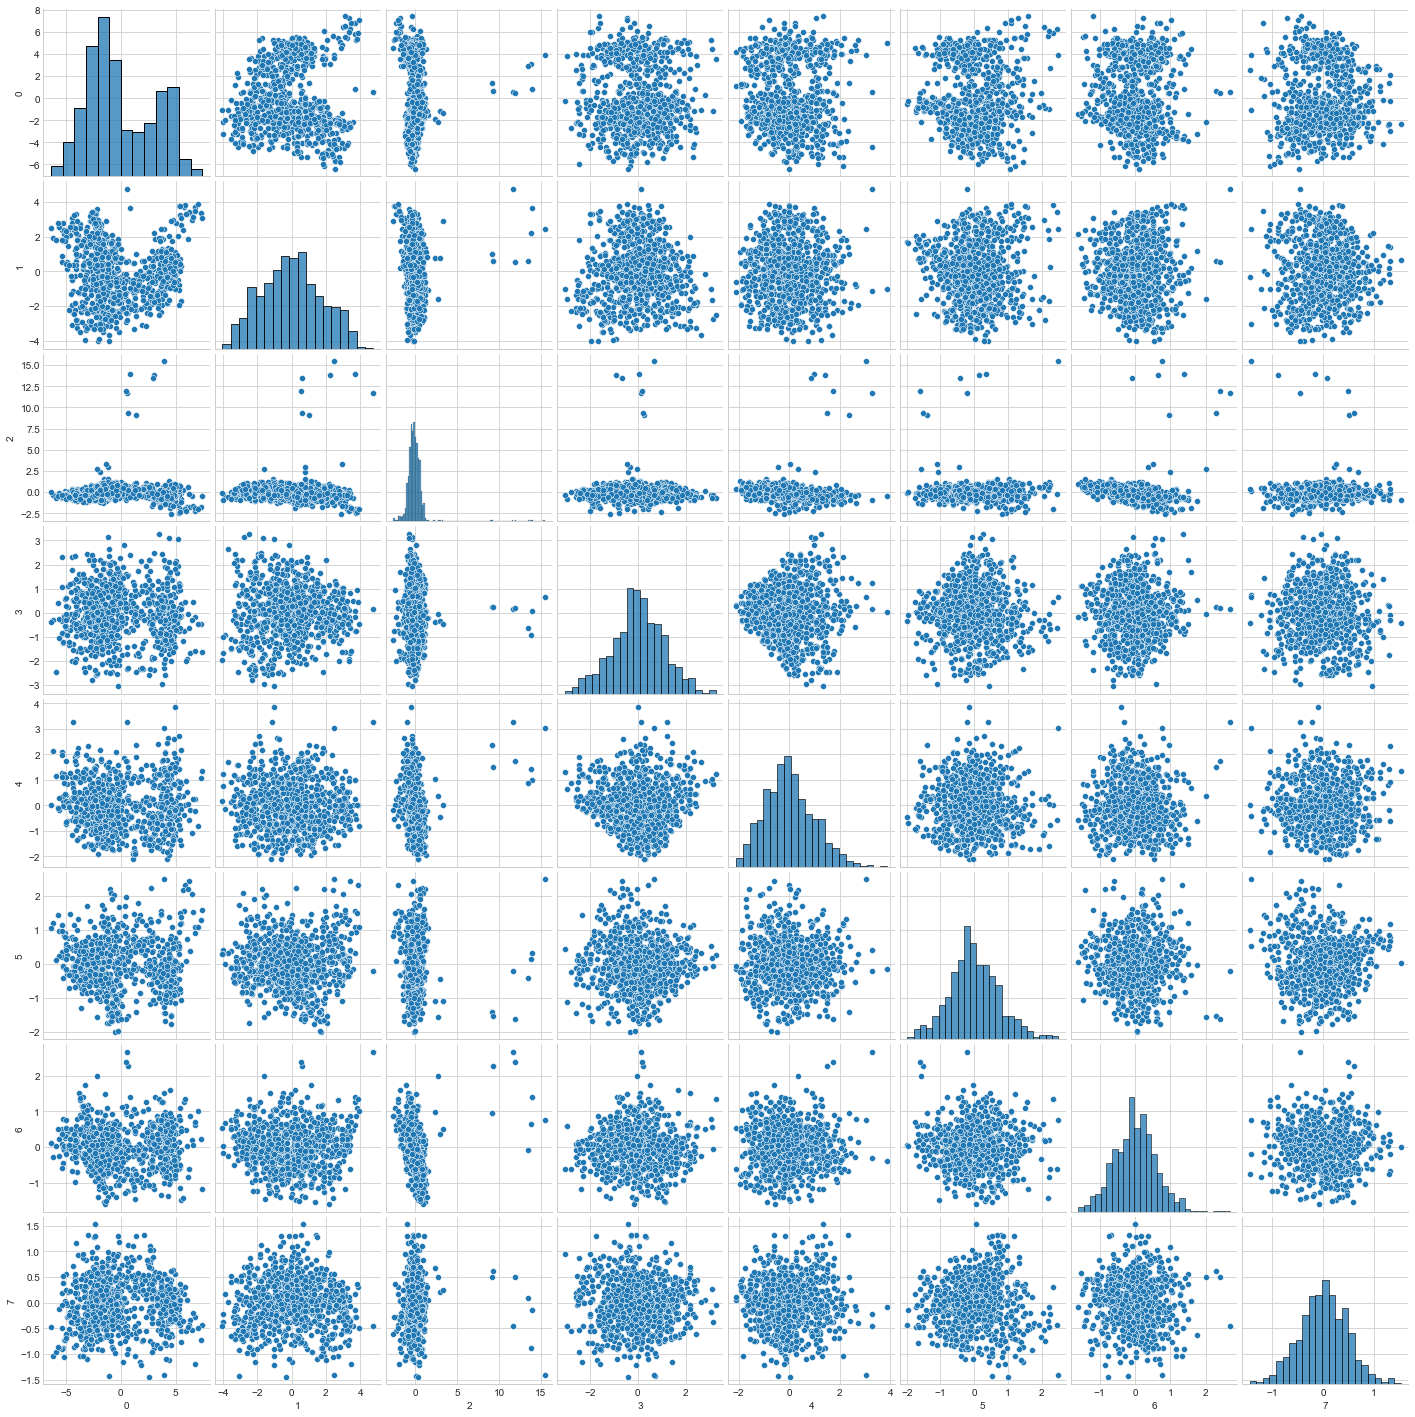

In [73]:
#pairplot of the new variables showing no correlation

sns.pairplot(pd.DataFrame(Xpca3))

## Fit Linear Model

Lets construct two linear models. The first with all the 17 independent variables and the second with only the 8 new variables constructed using PCA.

In [74]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
le = LabelEncoder() 
y = le.fit_transform(y)
y.shape

(846,)

In [ ]:
# from sklearn.linear_model import LinearRegression
# regression_model = LinearRegression()
# regression_model.fit(XScaled, y)
# regression_model.score(XScaled, y)

0.6602486689531759

In [ ]:
# regression_model_pca = LinearRegression()
# regression_model_pca.fit(Xpca3, y)
# regression_model_pca.score(Xpca3, y)

0.44738619649715605

<br>

## Splitting the dataset into training and testing set

In [76]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size = 0.1942313295, random_state = 14)

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [77]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC

svc = SVC()
#svc.fit(X_train,y_train)

In [ ]:
#Orig_y_predict = svc.predict(X_test) #predict on test data

In [ ]:
#svc.score(X_test, y_test) 

0.5393939393939394

In [78]:
#now split the data into 70:30 ratio

#orginal Data
Orig_X_train,Orig_X_test,Orig_y_train,Orig_y_test = train_test_split(XScaled,y,test_size=0.30,random_state=1)

#PCA Data
pca_X_train,pca_X_test,pca_y_train,pca_y_test = train_test_split(Xpca3,y,test_size=0.30,random_state=1)


In [79]:
svc.fit(Orig_X_train,Orig_y_train) #SVC on original data

SVC()

In [80]:
Orig_y_predict = svc.predict(Orig_X_test) #Prediction on original dataset

In [81]:
#now fit the model on pca data with new dimension
svc1 = SVC() #instantiate the object
svc1.fit(pca_X_train,pca_y_train)

#predict the y value
pca_y_predict = svc1.predict(pca_X_test) #Prediction on pca test dataset

In [82]:
#display accuracy score of both models
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_auc_score

print("Model Score On Original Data ",svc.score(Orig_X_test, Orig_y_test))
print("Model Score On Reduced PCA Dimension ",svc1.score(pca_X_test, pca_y_test))
print("-------"*10)
print("Before PCA On Original 18 Dimension",accuracy_score(Orig_y_test,Orig_y_predict))
print("After PCA(On 8 dimension)",accuracy_score(pca_y_test,pca_y_predict))

Model Score On Original Data  0.952755905511811
Model Score On Reduced PCA Dimension  0.937007874015748
----------------------------------------------------------------------
Before PCA On Original 18 Dimension 0.952755905511811
After PCA(On 8 dimension) 0.937007874015748


## **Observation:**

Our support vector classifier without performing PCA has an accuracy score of 95% on training data set

SVC model on PCA componenets(reduced dimensions) has an accuracy score of 93 %

Looks like by drop reducing dimensionality to 8 components, we only dropped around 2% in R^2! This is insample (on training data) and hence a drop in R^2 is expected. Still seems easy to justify the dropping of variables. An out of sample (on test data), with the 8 independent variables is likely to do better since that would be less of an over-fit.

Confusion Matrix For : 
 Original Data Set [[ 58   0   1]
 [  1 129   3]
 [  6   1  55]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

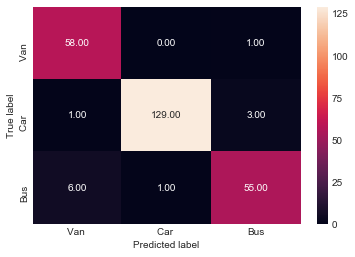

Confusion Matrix For : 
 Reduced Dimensions Using PCA  [[ 57   2   0]
 [  2 126   5]
 [  1   7  54]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

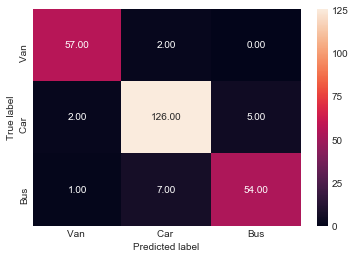

Classification Report For Raw Data: 
               precision    recall  f1-score   support

           0       0.89      0.98      0.94        59
           1       0.99      0.97      0.98       133
           2       0.93      0.89      0.91        62

    accuracy                           0.95       254
   macro avg       0.94      0.95      0.94       254
weighted avg       0.95      0.95      0.95       254

Classification Report For PCA: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        59
           1       0.93      0.95      0.94       133
           2       0.92      0.87      0.89        62

    accuracy                           0.93       254
   macro avg       0.93      0.93      0.93       254
weighted avg       0.93      0.93      0.93       254



In [ ]:
# Calculate Confusion Matrix & PLot To Visualize it

def draw_confmatrix(y_test, yhat, str1, str2, str3, datatype ):
    #Make predictions and evalute
    #model_pred = fit_test_model(model,X_train, y_train, X_test)
    cm = confusion_matrix( y_test, yhat, [0,1,2] )
    print("Confusion Matrix For :", "\n",datatype,cm )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [str1, str2,str3] , yticklabels = [str1, str2,str3] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    

draw_confmatrix(Orig_y_test, Orig_y_predict,"Van ", "Car ", "Bus", "Original Data Set" )

draw_confmatrix(pca_y_test, pca_y_predict,"Van ", "Car ", "Bus", "Reduced Dimensions Using PCA ")

#Classification Report Of Model built on Raw Data
print("Classification Report For Raw Data:", "\n", classification_report(Orig_y_test,Orig_y_predict))

#Classification Report Of Model built on Principal Components:

print("Classification Report For PCA:","\n", classification_report(pca_y_test,pca_y_predict))

##  **Observations**

Confusion Matrix On **Original Data:**


  - Our model on original data set has correctly classified 58 van out of 59 actuals vans with only 1 wrongly predicted as Car
  
  - our model has correcly classified 129 cars and has wrongly classified 3 cars to be a bus and also 1 car to be a van
  
  - Again, in the case of 62 instances of actual bus , our model has correctly classified 56 buses , It has faltered in classifying wrongly 6 buses to be a van and 1 bus to be a car. 


Confusion Metric On **Reduced Dimesnion After PCA :**



- Out of 59 actual instances of vans our model has correctly predicted 57 vans and errored in 2 instances where it wrongly classified vans to be a car. 
- Out of 133 actuals cars , our mdoel has correclty classified 126 of them to be a  car and faltered in 7 cases where it wrongly classified 5 cars to a bus and 2 cars to be a van. 

- Out of 62 actual bus , our model has correclty classified 54 of them to be a bus. It has faltered in 8 cases where it wrongly classified 7 bus to be a car and 1 bus to be a van.

**Insights On Classification Reports:**

On original data:

 - our model has 99 % precison  score when it comes to classify car from the given set of silhoutte parameters. It has 89 % precision when it comes to classifying the input as van, while it has 93 % precison when it come to predict data as bus. 

 - In term of recall score our model has recal score of 98 % for van classification, 97 % for car and 89 % for bus. 
 - OUr model has an weighted average of 95 % for all classification metrics. 

On Reduced Dimensions After PCA:

 - Our model has highest precision score of 95 % when it comes to predict van type, which is better as compared to predcition done on original data set, which came out with the precision score of 89 % for van. 
 - Recall score is almost neck to neck with what our model scored on original data set. It showed highest recall score of 97 % in classifying data as car. 

<br>

# **MrBriit**